In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

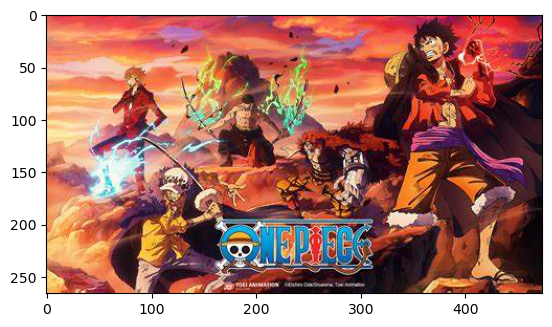

In [2]:
img = cv2.imread("C:/Users/student/Downloads/OIP.jpg")

bgri= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(bgri)
 


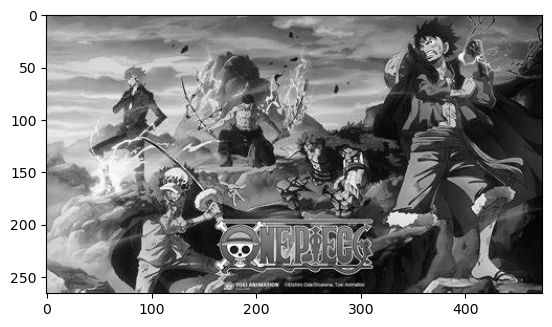

In [3]:
BGG = cv2.cvtColor(bgri, cv2.COLOR_RGB2GRAY)

plt.imshow(BGG,cmap='gray')
# cv2.imshow('i',BGG)
# cv2.waitKey(0) 
# cv2.destroyAllWindows()


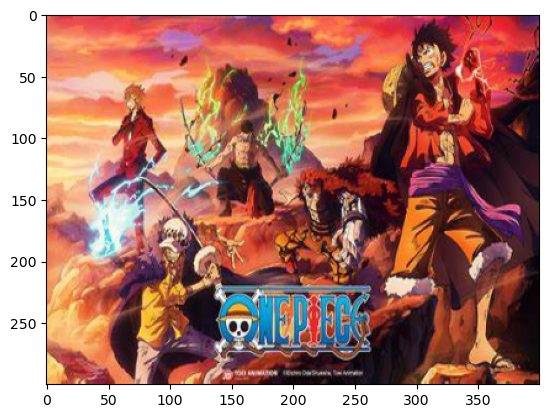

In [4]:
rimg = cv2.resize(bgri, (400,300)) 
plt.imshow(rimg)

In [5]:
# resized_img = cv2.resize(img, (500,380)) 
# resgb = cv2.cvtColor(rimg, cv2.COLOR_BGR2RGB) 
# cv2.imshow('i',resgb)
# cv2.waitKey(0) 
# cv2.destroyAllWindows()

In [6]:
# h,w,c=rimg.shape
# # print(h,w,c)

# gimg=np.zeros((h,w),dtype=np.uint8)
# # print(gimg)

# for i in range(h):
#     for j in range(w):
#         r=rimg[i,j,2]
#         g=rimg[i,j,1]
#         b=rimg[i,j,0]
#         gval=int(0.299 * r + 0.598 * g + 0.114 * b)
#         gimg[i,j]=gval

# cv2.imshow('Manual Grayscale Image', gimg)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

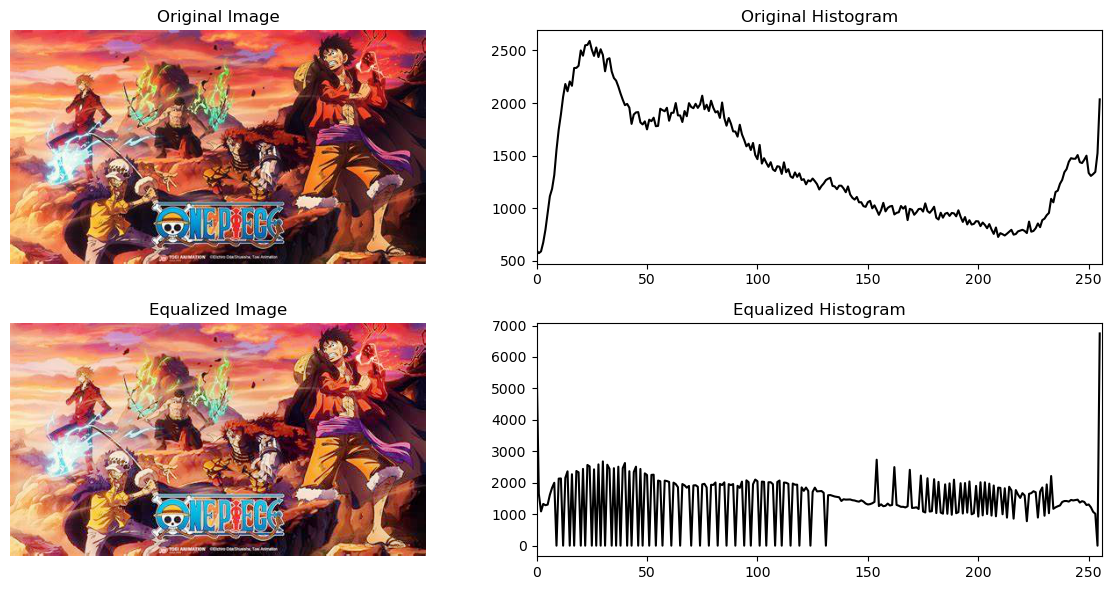

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


#  Calculate the Histogram of the image
histogram, bins = np.histogram(rimg.flatten(), 256, [0, 256])

#  Compute the Cumulative Distribution Function (CDF)
cdf = histogram.cumsum()  # Cumulative sum of the histogram

# Normalize the CDF to the range [0, 255]
cdf_normalized = cdf * float(histogram.max()) / cdf.max()

# Mask out the zeros in the CDF (for normalization purposes)
cdf_m = np.ma.masked_equal(cdf, 0)  # Mask out zero values
cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())  # Normalize the CDF
cdf = np.ma.filled(cdf_m, 0).astype('uint8')  # Fill the masked values with 0

#  Use the CDF to map the pixel intensities in the image
equalized_image = cdf[bgri]

# Step 7: Plot the histograms and the images
plt.figure(figsize=(12, 6))

# Plot original image and its histogram
plt.subplot(2, 2, 1)
plt.imshow(bgri, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.plot(histogram, color='black')
plt.title('Original Histogram')
plt.xlim([0, 256])

# Plot equalized image and its histogram
plt.subplot(2, 2, 3)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

# Calculate the new histogram
equalized_histogram, _ = np.histogram(equalized_image.flatten(), 256, [0, 256])

plt.subplot(2, 2, 4)
plt.plot(equalized_histogram, color='black')
plt.title('Equalized Histogram')
plt.xlim([0, 256])

# Show all the plots
plt.tight_layout()
plt.show()




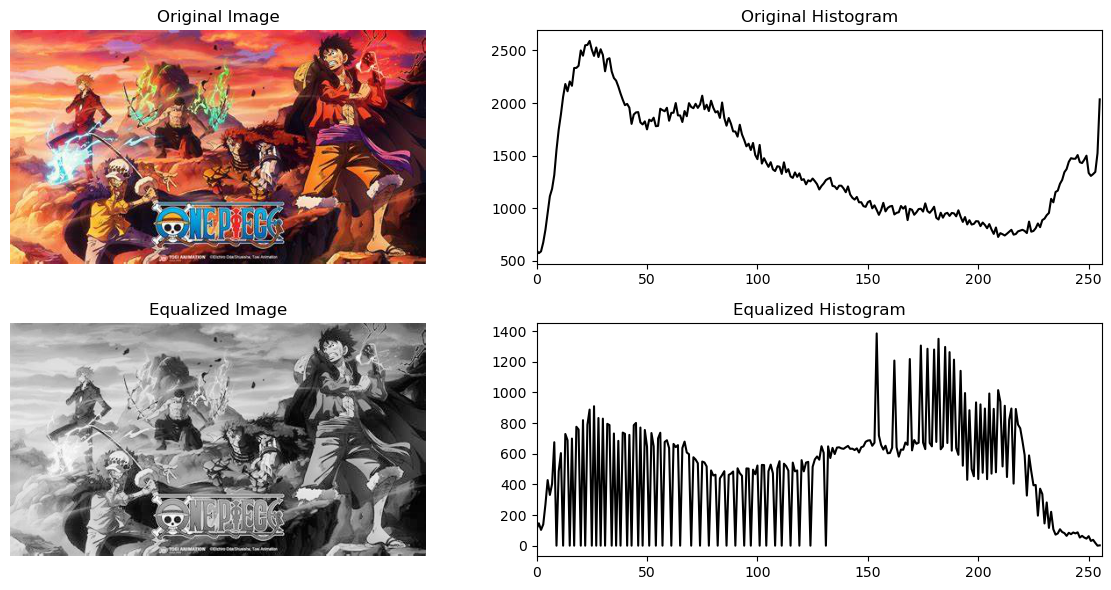

In [14]:
BGG = cv2.cvtColor(bgri, cv2.COLOR_RGB2GRAY)

equalized_image = cdf[BGG]

# Step 7: Plot the histograms and the images
plt.figure(figsize=(12, 6))

# Plot original image and its histogram
plt.subplot(2, 2, 1)
plt.imshow(bgri, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.plot(histogram, color='black')
plt.title('Original Histogram')
plt.xlim([0, 256])

# Plot equalized image and its histogram
plt.subplot(2, 2, 3)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

# Calculate the new histogram
equalized_histogram, _ = np.histogram(equalized_image.flatten(), 256, [0, 256])

plt.subplot(2, 2, 4)
plt.plot(equalized_histogram, color='black')
plt.title('Equalized Histogram')
plt.xlim([0, 256])

# Show all the plots
plt.tight_layout()
plt.show()
